# Single cell entrainment quality 
### 1. Overview
It's experimetally shown that upon an adaptive spike is elicited by $cAMP_{e}$ stimulation,there exists a refractory period- the stimulation has to be withdrawn for a certain lngth of time until a second adaptive spike can be elicited by the same input concentration. This feature can be quantified with a entrainment quality heatmap (Figure 4B). With different input period and ON time (peak width, Figure 4A), single *Dictyostelium* cells shows different degrees of entrainment quality(i.e. how much the subsequent spikes resemble the first spike). 

With this notebook, you can play with different $cAMP_{e}$ input concentraions, entrainment period width, entrainment peak width, and visualize single cell response traces ($cAMP_{i}$) as well as entrainment quality heatmaps. By default,period and peak width for each model is sampled from 0.8 ~1.8 and 0.4 ~1.4  times the respect time scale normalization parameter.
![Figure 4](SC_entrainment_1.png)
<h5><center>Figure4</center></h5>

#### Let's start by importing packages and setting up time scaling parameters

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import scipy.io

from Gregor2010_agent_and_pop_FUN import  Gregor2010_agent
from Sgro2015_agent_and_pop_FUN import Sgro2015_agent
from Goldbeter1987_agent_and_pop_FUN import Goldbeter1987_agent_3var
from MaedaLoomis2004_agent_and_pop_FUN import MaedaLoomis2004_agent
from Kamino2017_agent_and_pop_FUN import Kamino2017_agent 

from NB_SC_functions import * 

from NormParam import *

### 2. Experimental data 
#### import and plot experimental data (from [Sgro et al 2015](https://www.embopress.org/doi/full/10.15252/msb.20145352) )

C:\Users\ellin\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


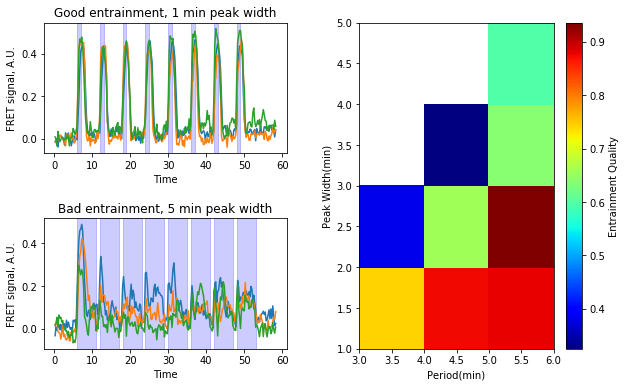

In [2]:
Sgro2015Figure4 = scipy.io.loadmat('C:/Users/ellin/Dropbox/AACP Science/Dicty model review drafts/figures/Figure4Data.mat')
Sgro2015Figure4excel = pd.read_excel(r'C:/Users/ellin/Dropbox/AACP Science/Dicty model review drafts/figures/Sgro2015DataFormattedforPython.xlsx',sheetname='Figure4')
fig = plt.figure(figsize=(10,6))
grid = plt.GridSpec(2, 2, wspace=0.3, hspace=0.5)
ax1= fig.add_subplot(grid[0, 0])
ax1.plot(Sgro2015Figure4excel["Time (min)"],Sgro2015Figure4excel["Cell 1 FRET Trace (1 min pulse)"])
ax1.plot(Sgro2015Figure4excel["Time (min)"],Sgro2015Figure4excel["Cell 2 FRET Trace (1 min pulse)"])
ax1.plot(Sgro2015Figure4excel["Time (min)"],Sgro2015Figure4excel["Cell 3 FRET Trace (1 min pulse)"])
for i in range(8):
    ax1.axvspan(6+i*6, 7+i*6, alpha=0.2, color='b')
ax1.set_title('Good entrainment, 1 min peak width')
ax1.set_xlabel('Time');ax1.set_ylabel('FRET signal, A.U.')

ax2= fig.add_subplot(grid[1, 0])
ax2.plot(Sgro2015Figure4excel["Time (min)"],Sgro2015Figure4excel["Cell 1 FRET Trace (5 min pulse)"])
ax2.plot(Sgro2015Figure4excel["Time (min)"],Sgro2015Figure4excel["Cell 2 FRET Trace (5 min pulse)"])
ax2.plot(Sgro2015Figure4excel["Time (min)"],Sgro2015Figure4excel["Cell 3 FRET Trace (5 min pulse)"])
for i in range(8):
    ax2.axvspan(6+i*6, 11+i*6, alpha=0.2, color='b')
ax2.set_title('Bad entrainment, 5 min peak width')
ax2.set_xlabel('Time');ax2.set_ylabel('FRET signal, A.U.')

ax3 = fig.add_subplot(grid[:, 1])
PeriodExp = np.linspace(3, 6, num=4); PkWdthExp = np.linspace(1,5,5)
entrainmentRs = Sgro2015Figure4["entrainmentRs"][:,0:4]; entrainmentRs[entrainmentRs == 0] = 'nan'
heatmap = ax3.pcolor(PeriodExp, PkWdthExp,np.flip(entrainmentRs,0), cmap='jet') 
#heatmap.set_clim(0,1)
ax3.set_xlabel('Period(min)'); ax3.set_ylabel('Peak Width(min)')
cbar=fig.colorbar(heatmap, ax=ax3);
cbar.set_label( 'Entrainment Quality')
plt.show()

### 3. Matiel 1986
#### Set up parameters (from Table II in [Matiel & Goldbeter 1986](https://www.sciencedirect.com/science/article/pii/S0006349587832757?via%3Dihub) )

In [3]:
k1 = 0.036     # per min
k2 = 0.666    # per min
L1 = 10; L2 = 0.005 
c = 10;           # 0.15 ~ 50
lamda = 0.01; theta = 0.01; e =  1 ; q = 4000; sig= 0.6
v = 12; k = 4 # k prime in the paper
ki = 1.7; kt = 0.9; kc = 5.4; h = 5
Goldbeter3AgentParam={'k1':k1,'k2':k2,'L1':L1,'L2':L2, 'c':c, 'lamda':lamda,\
            'theta':theta, 'e':e, 'q':q,'sig':sig, 'v':v, 'k':k, \
            'ki':ki,'kt':kt, 'kc':kc,'h':h}

#### Define entrainment period and peak width (ON time in each period) screening array andgetsimulated response
Optional: visualize $cAMP_{i}$ responses of defined periods and peak widths

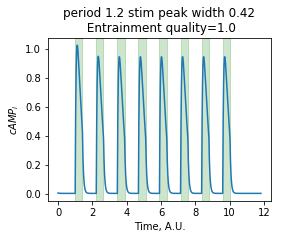

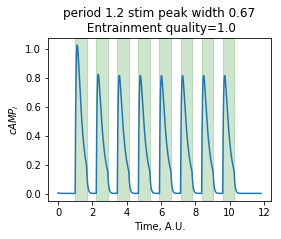

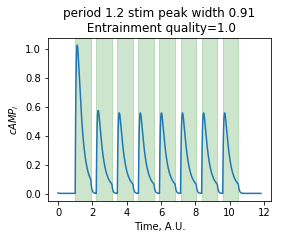

In [4]:
period_space_Gold =np.linspace(0.8,1.8,num=8) # period of cAMPe stim 
PkWdth_space_Gold = np.linspace(0.3, 1.4, num=10) # peak width of cAMP stim


dt=0.001 ; 
cAMP = 1 # extracellular cAMP
NumofCycle = 8
# define which traces to plot, 1st column defines the index of the period, 
# 2nd column defines the index of the peak width
single_trace_to_plot = np.array([[3,1],[3,3], [3,5]])
MeanR_Gold = SC_entrainment(period_space_Gold, PkWdth_space_Gold, NumofCycle, cAMP, 
                            Nt_Goldbeter, Nh_Goldbeter, dt, single_trace_to_plot, 
                            Goldbeter1986_SC,Goldbeter3AgentParam )

#### Plot entrainment quality heatmap with specified color limits

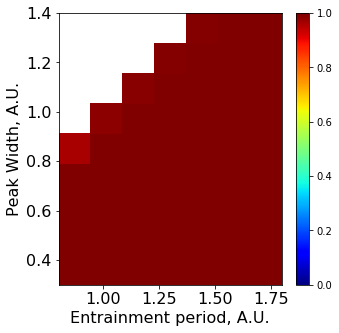

In [5]:
clim = [0,1] # color limit of the colorbar
SC_entrainment_plot(period_space_Gold, PkWdth_space_Gold,MeanR_Gold,clim)


### 4. Maeda 2004
#### Set up parameters (from supplementary in [Maeda et al 2004](https://science.sciencemag.org/content/304/5672/875/tab-figures-data) )

In [6]:
k1=2.0; k2=0.9; k3=2.5; k4=1.5; k5=0.6
k6=0.8; k7=1.0; k8=1.3; k9=0.3; k10=0.8
k11=0.7; k12=4.9; k13=23; k14=4.5
MaedaAgentParam={'k1':k1,'k2':k2,'k3':k3,'k4':k4,'k5':k5,'k6':k6,\
            'k7':k7,'k8':k8,'k9':k9,'k10':k10,'k11':k11,'k12':k12,\
            'k13':k13,'k14':k14}

#### Define entrainment period and peak width (ON time in each period) screening array
Optional: visualize $cAMP_{i}$ responses of defined periods and peak widths

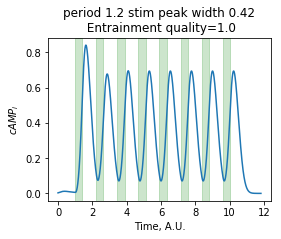

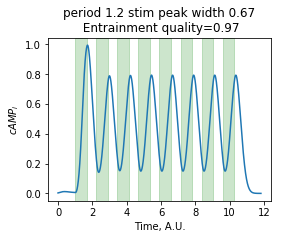

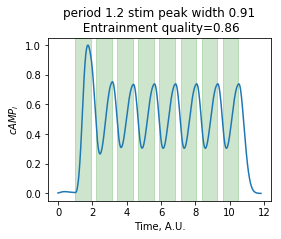

In [8]:
period_space_Maeda = np.linspace(0.8,1.8,num=8) # period of cAMPe stim 
PkWdth_space_Maeda =  np.linspace(0.3, 1.4, num=10) # peak width of cAMP stim


dt=0.001 ; # t_tot=20*Nt; t=list(np.arange(0,t_tot,dt))
cAMP = 1 # extracellular cAMP
NumofCycle = 8
# define which traces to plot, 1st column defines the index of the period, 
# 2nd column defines the index of the peak width
single_trace_to_plot = np.array([[3,1],[3,3], [3,5]])
MeanR_Maeda = SC_entrainment(period_space_Maeda, PkWdth_space_Maeda, NumofCycle, cAMP, 
                            Nt_Maeda,Nh_Maeda, dt, single_trace_to_plot, 
                            Maeda2004_SC,MaedaAgentParam )

#### Plot entrainment quality heatmap with specified color limits

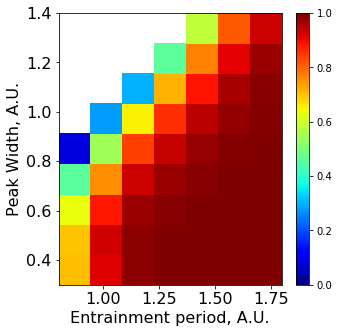

In [9]:
clim = [0,1] # color limit of the colorbar
SC_entrainment_plot(period_space_Maeda, PkWdth_space_Maeda,MeanR_Maeda,clim)

### 5. Sgro 2015
#### Set up parameters

In [10]:
e=0.1 # excitability
sigma = 0.15 # noise strength
tauA=0.09; tauR=tauA/e; g=0.5
SgroAgentParam={'e':e,'tauA':tauA,'tauR':tauR,'g':g,'c0':1.2,'sigma':sigma,'N':100,\
            'a':0.058,'alpha0':800,'alpha_pde':1000,'Kd':1e-5,'S':1e6,\
            'Nt':27,'Na':3.5,'offset_A':1.5,'flux_thrs':0}

#### Define entrainment period and peak width (ON time in each period) screening array
Optional: visualize $cAMP_{i}$ responses of defined periods and peak widths

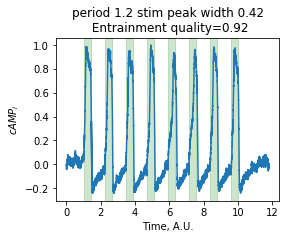

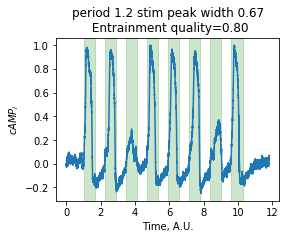

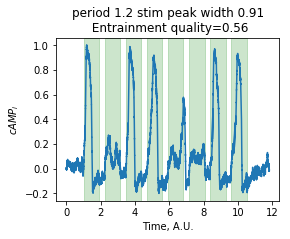

In [11]:
period_space_Sgro = np.linspace(0.8,1.8,num=8) # period of cAMPe stim 
PkWdth_space_Sgro =  np.linspace(0.3, 1.4, num=10) # peak width of cAMP stim


dt=0.005; # t_tot=20*Nt; t=list(np.arange(0,t_tot,dt))
cAMP = 1 # extracellular cAMP
NumofCycle = 8
# define which traces to plot, 1st column defines the index of the period, 
# 2nd column defines the index of the peak width
single_trace_to_plot = np.array([[3,1],[3,3], [3,5]])
MeanR_Sgro = SC_entrainment(period_space_Sgro, PkWdth_space_Sgro, NumofCycle, cAMP, 
                            Nt_Sgro, Nh_Sgro, dt, single_trace_to_plot, 
                            Sgro2015_SC,SgroAgentParam )

#### Plot entrainment quality heatmap with specified color limits

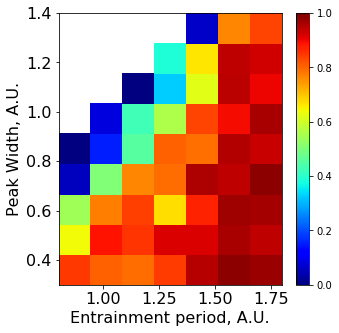

In [12]:
clim = [0,1] # color limit of the colorbar
SC_entrainment_plot(period_space_Sgro, PkWdth_space_Sgro,MeanR_Sgro,clim)

### 7. Kamino 2017
#### Set up parameters

In [13]:
tau=1.5; n=2; K=4; kt=2; delta=0.01
gamma=3 # cAMPe dilution/degradation rate 
rho= 0.01 # population density, doesn't matter for single cells
KaminoAgentParam={'tau':tau,'n':n,'K':K,'kt':kt,'delta':delta,\
               'gamma':gamma,'rho':rho}

#### Define entrainment period and peak width (ON time in each period) screening array
Optional: visualize $cAMP_{i}$ responses of defined periods and peak widths

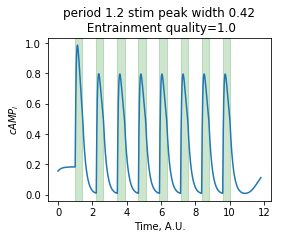

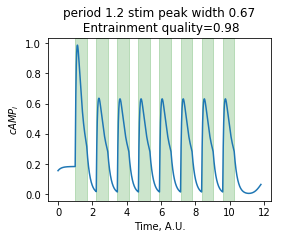

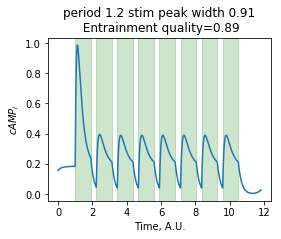

In [14]:
period_space_Kamino = np.linspace(0.8,1.8,num=8) # period of cAMPe stim 
PkWdth_space_Kamino =  np.linspace(0.3, 1.4, num=10) # peak width of cAMP stim


dt=0.001 ; # t_tot=20*Nt; t=list(np.arange(0,t_tot,dt))
cAMP = 1 # extracellular cAMP
NumofCycle = 8
# define which traces to plot, 1st column defines the index of the period, 
# 2nd column defines the index of the peak width
single_trace_to_plot = np.array([[3,1],[3,3], [3,5]])
MeanR_Kamino = SC_entrainment(period_space_Kamino, PkWdth_space_Kamino, NumofCycle, cAMP, 
                            Nt_Kamino, Nh_Kamino, dt, single_trace_to_plot, 
                            Kamino2017_SC, KaminoAgentParam )

#### Plot entrainment quality heatmap with specified color limits

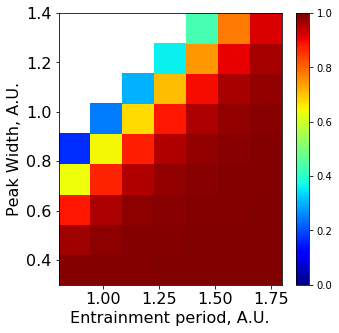

In [15]:
clim = [0,1] # color limit of the colorbar
SC_entrainment_plot(period_space_Kamino, PkWdth_space_Kamino,MeanR_Kamino,clim)
